<a href="https://colab.research.google.com/github/samarkinav/Machine-learning/blob/main/sklearn_linear_model_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [3]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1,
                                              noise = 5., coef = True, random_state = 2)

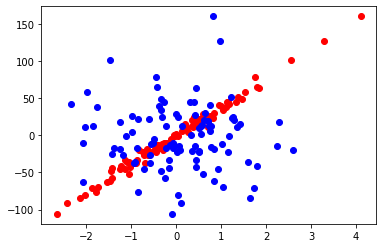

In [4]:
pylab.scatter(data[:,0], target, color = 'r')
pylab.scatter(data[:,1], target, color = 'b')

Сначала мы построим объекты в плоскости «нулевой признак–целевая метка», отрисуем их красным цветом, а потом мы построим те же самые объекты в плоскости «первый признак–метка» и отрисуем их синим цветом. Так как пространство значения признаков у нас совпадает, мы можем сделать это на одной плоскости, на одном графике. По этому графику легко проанализировать и понять, какой же из двух признаков является информативным.

Теперь построим модель и посмотрим на коэффициенты между этими признаками. Мы ожидаем больший коэффициент по модулю перед информативным признаком и меньший коэффициент по абсолютной величине перед избыточным признаком.

In [5]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,
                                                                                    test_size = 0.3)

#### LinearRegression

In [6]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [7]:
print(test_labels)

[ 14.76930132 -27.02798161 -21.47606913 -32.71074998  11.96165156
  18.17188553 126.64909941  24.47584129 -10.06708677 -19.36956003
 -13.26392817 -36.44717565  23.87701013  64.70214251 -80.80239408
   1.72644759 -40.84204295 -12.0017312   38.36241814   5.86887774
 -16.30914909  24.82763821  19.66406455 -84.32102748  20.87713077
  44.41658249  25.7124082   41.1068411   11.06961035 -22.64686884]


In [8]:
print(predictions)

[  7.20369052 -24.86299094 -18.35461305 -44.31074051  13.53640241
  19.23270683 126.16206764  23.18877138  -8.87706267 -32.49721943
 -16.53129342 -41.15962965  31.21663671  68.93483859 -79.30569723
  -0.5313108  -47.97412801  -7.70232245  42.7614625    4.25400643
 -12.69148781  30.22746527  26.35013497 -83.30262857  13.33530726
  44.39315462  28.81458873  36.56596759  26.80725315 -18.08384986]


In [9]:
metrics.mean_absolute_error(test_labels, predictions)

4.538744564304588

Сделаем оценку чуть более точной:

In [10]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error',
                                                 cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779696, std: 1.0737104492890197


Создадим scorer с помощью функции make_scorer и скажем, что для нашей метрики greater_is_better, то есть значение, когда наша метрика растет, это лучше. Естественно, это не так, но просто с помощью такого параметра мы избавимся от искусственного умножения на (−1). 

In [11]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [12]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer,
                                                 cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779696, std: 1.0737104492890197


In [13]:
coef

array([38.07925837,  0.        ])

In [14]:
linear_regressor.coef_

array([38.65300751, -0.18265178])

In [15]:
linear_regressor.intercept_

-0.4326264478139681

In [29]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [23]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0],
                                                  linear_regressor.coef_[1],
                                                  linear_regressor.intercept_))

y = 38.65*x1 + -0.18*x2 + -0.43


Ответ довольно близок к исходному. Теперь попробуем решить ту же самую задачу с помощью другого метода регрессии. Рассмотрим лассо-регрессию — регрессию с использованием регуляризации lasso или регуляризации L1.

#### Lasso

In [24]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [25]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.1544782466663985, std: 1.0170354384993352


Качество стало немножечко хуже.

In [26]:
print(lasso_regressor.coef_)

[37.90153378 -0.        ]


In [27]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [28]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 37.90*x1 + -0.00*x2


Отличие в том, что в данном случае перед неинформативным признаком мы получили 0. Здесь мы видим результат применения L1-регуляризации. На этом модельном примере очень хорошо видны особенности работы лассо-регуляризации. Видим, что у нас как будто бы произошел отбор признаков. Перед избыточным признаком мы получили вес 0. 